<a href="https://colab.research.google.com/github/taciomattos/Modelo-vinho/blob/main/Code/projeto_aplicado_prototipo_tacio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Disciplina: Projeto Aplicado Análise Preditiva e Vantagem Competitiva

#### Aluno: Tacio Roberto Mattos de Oliveira

#### Professor: Sérgio Monteiro
#### Curso: MBA em BI & Data Science

# **Instalação dos Pacotes**

In [ ]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importação dos Pacotes**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# **Baixar Dados Reais**

In [ ]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [ ]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [ ]:

tickers = ['PETR4.SA', 'ABUD34.SA', 'MMMC34.SA', 'A1BB34.SA', 'ABTT34.SA','ABBV34.SA', 'RYTT34.SA', 'USBC34.SA', 'ADBE34.SA', 'XPBR31.SA']

df = yf.download(tickers, 
                 start='2023-02-09', 
                 end='2023-02-25',
                 group_by="ticker"); 

df.head()

[*********************100%***********************]  10 of 10 completed


A1BB34.SA                                                     \
                 Open       High        Low      Close  Adj Close Volume   
Date                                                                       
2023-02-09  44.160000  44.480000  44.160000  44.200001  44.200001     10   
2023-02-10  43.439999  43.720001  43.439999  43.720001  43.720001     18   
2023-02-13  43.610001  43.610001  43.610001  43.610001  43.610001      1   
2023-02-14  43.610001  44.040001  43.610001  44.040001  44.040001     21   
2023-02-15  44.520000  44.759998  44.520000  44.759998  44.759998     12   

            ABTT34.SA                                   ...  XPBR31.SA  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2023-02-09  48.189999  48.189999  47.270000  47.270000  ...  82.339996   
2023-02-10  47.049999  47.049999  47.000000  47.000000  ...  80.279999   
2023-02-13  47.200001  47.200001  47.200001  47.200001  ...  80.709999   
2023-02-14  47.200001  47.200001  47.200001  47.200001  ...  81.860001   
2023-02-15  46.349998  46.349998  46.349998  46.349998  ...  81.559998   

                                          RYTT34.SA                        \
                Close  Adj Close  Volume       Open       High        Low   
Date                                                                        
2023-02-09  82.690002  82.690002  904775  86.000000  86.120003  85.480003   
2023-02-10  81.230003  81.230003  649433  85.510002  87.480003  85.339996   
2023-02-13  84.000000  84.000000  400048  87.500000  87.500000  86.599998   
2023-02-14  82.989998  82.989998  472429  86.690002  88.190002  86.690002   
2023-02-15  83.989998  83.989998  619864  87.730003  87.730003  87.730003   

                                         
                Close  Adj Close Volume  
Date                                     
2023-02-09  85.779999  85.313713    564  
2023-02-10  87.480003  87.004478   2416  
2023-02-13  86.690002  86.218773     74  
2023-02-14  88.190002  87.710617    176  
2023-02-15  87.730003  87.253120      7  

[5 rows x 60 columns]

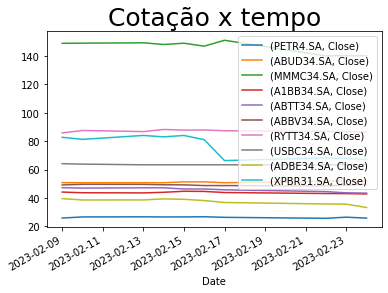

<Figure size 432x288 with 0 Axes>

In [ ]:
for acao in tickers:
  serie = df[acao, 'Close']
  serie.plot()

plt.title("Cotação x tempo", fontsize = 25)
# Legendas
#plt.legend(loc='lower left')
#plt.legend(loc=2)
plt.legend(loc='best')
plt.figure();

###Realizando as predições por ação individualmente

In [ ]:
y=[]
for a in df['PETR4.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.         0.15596335]
treino[2]: [2.         0.88073298]
treino[3]: [3.        0.9541274]
treino[4]: [4.         0.86238569]
treino[5]: [5.         0.89908202]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))


treino[1]: [[0.15596335]
 [0.88073298]] -> 0.9541273968719487
treino[2]: [[0.88073298]
 [0.9541274 ]] -> 0.8623856903376181
treino[3]: [[0.9541274 ]
 [0.86238569]] -> 0.8990820229791732
treino[4]: [[0.86238569]
 [0.89908202]] -> 1.0
treino[5]: [[0.89908202]
 [1.        ]] -> 0.6238534036544094


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 100)            40800     
                                                                 
 dropout_4 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.823251,0.657413
1,0.783242,0.621526
2,0.750230,0.586252
3,0.709917,0.551158
4,0.672459,0.515878


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 40ms/step - loss: 0.0798
loss: 0.07980065792798996


**Visualização do Processo de Aprendizado**

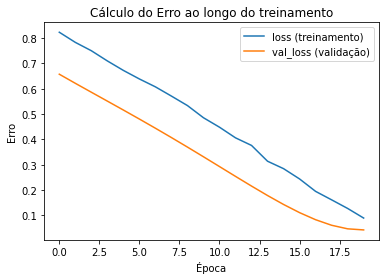

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 3s 3s/step


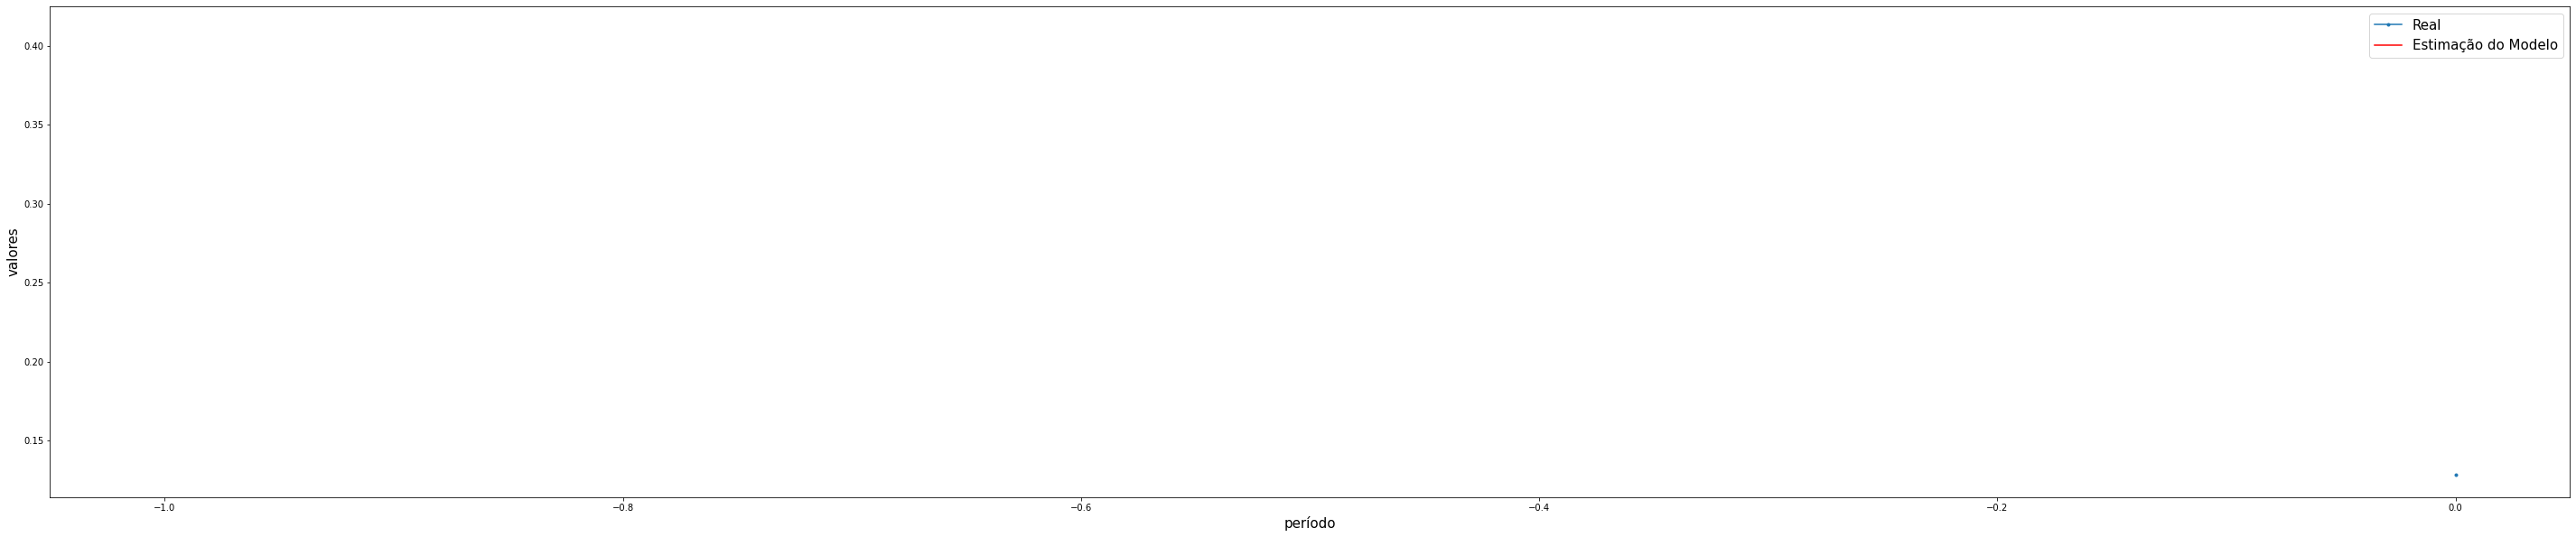

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.        ],
       [0.72476963]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 2s 2s/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.12617773]
 [0.24234118]]


#ABUD34

In [ ]:
y=[]
for a in df['ABUD34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.         0.03906194]
treino[2]: [2.         0.01562537]
treino[3]: [3.         0.01562537]
treino[4]: [4.         0.01562537]
treino[5]: [5.         0.47656343]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.03906194]
 [0.01562537]] -> 0.015625372529385118
treino[2]: [[0.01562537]
 [0.01562537]] -> 0.015625372529385118
treino[3]: [[0.01562537]
 [0.01562537]] -> 0.4765634313234628
treino[4]: [[0.01562537]
 [0.47656343]] -> 0.4765634313234628
treino[5]: [[0.47656343]
 [0.47656343]] -> 0.0


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_5 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.075849,0.108594
1,0.073015,0.103973
2,0.070211,0.099531
3,0.067467,0.095218
4,0.064741,0.091003


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 68ms/step - loss: 0.4700
loss: 0.4700366258621216


**Visualização do Processo de Aprendizado**

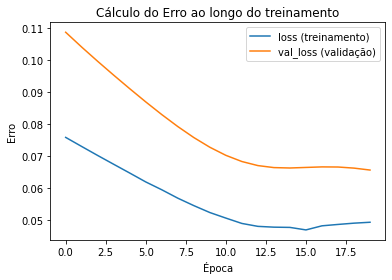

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 2s 2s/step


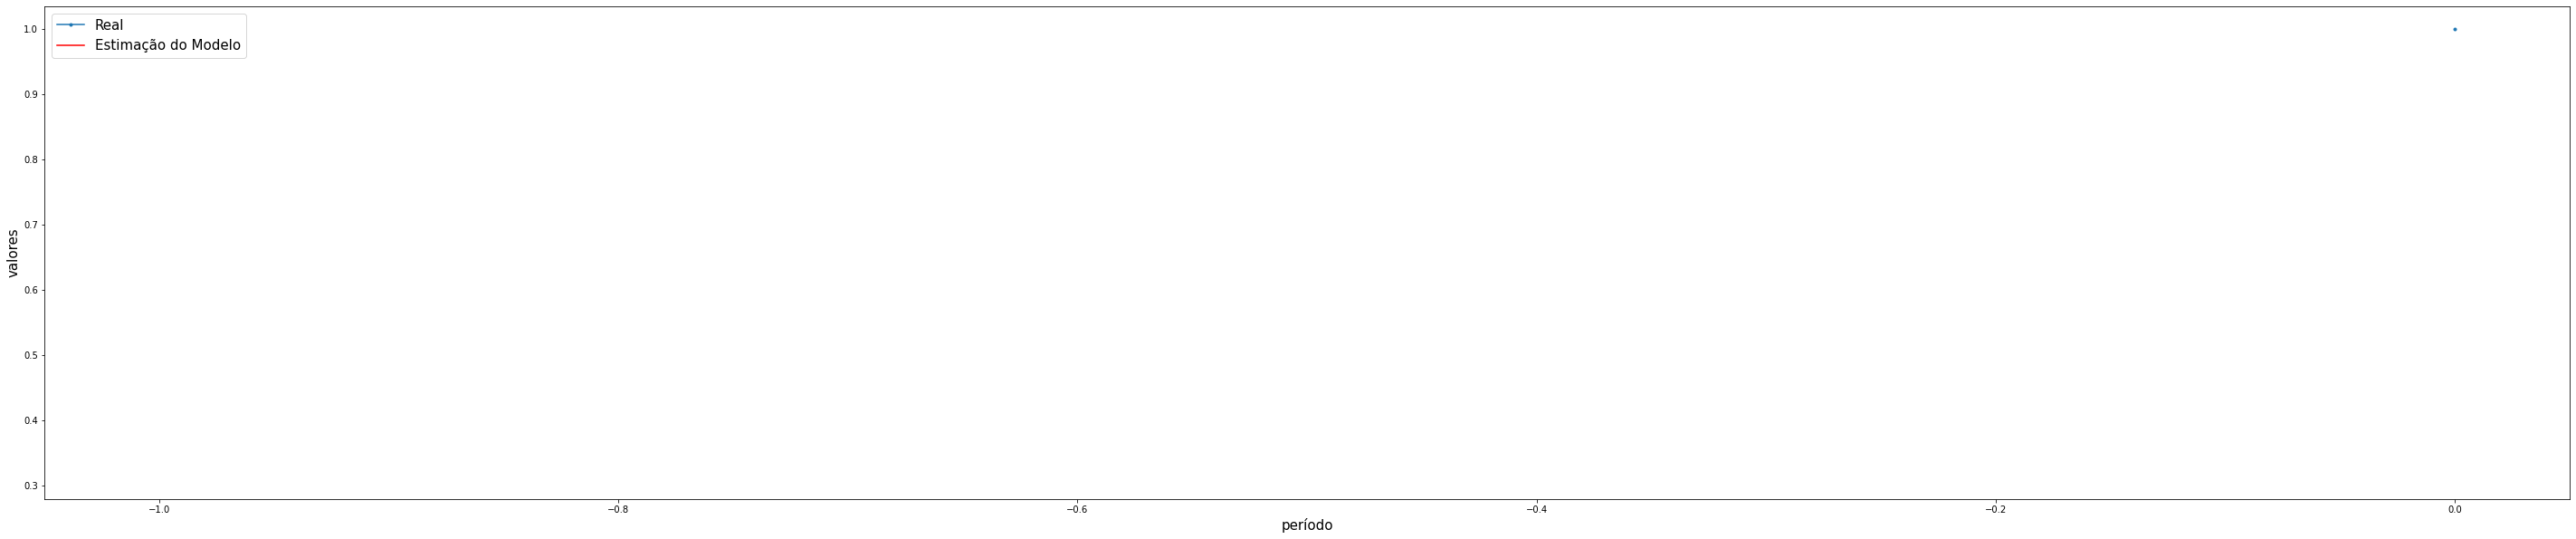

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.84375224],
       [0.89843955]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 2s 2s/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.13340005]
 [0.13553233]]


#MMMC34

In [ ]:
y=[]
for a in df['MMMC34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.        0.8067147]
treino[2]: [2.         0.81488271]
treino[3]: [3.         0.83756873]
treino[4]: [4.         0.73230528]
treino[5]: [5.         0.81125218]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.8067147 ]
 [0.81488271]] -> 0.837568730294777
treino[2]: [[0.81488271]
 [0.83756873]] -> 0.7323052808959204
treino[3]: [[0.83756873]
 [0.73230528]] -> 0.8112521756227785
treino[4]: [[0.73230528]
 [0.81125218]] -> 0.6243196202750735
treino[5]: [[0.81125218]
 [0.62431962]] -> 1.0


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_6 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               117248    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.626317,0.657188
1,0.593252,0.625314
2,0.560808,0.593503
3,0.527644,0.561322
4,0.494656,0.528495


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 23ms/step - loss: 0.0884
loss: 0.08844611793756485


**Visualização do Processo de Aprendizado**

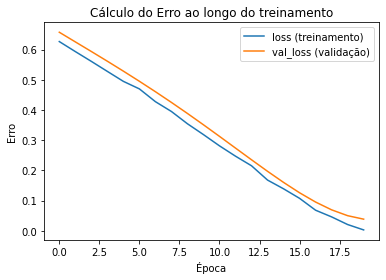

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 595ms/step


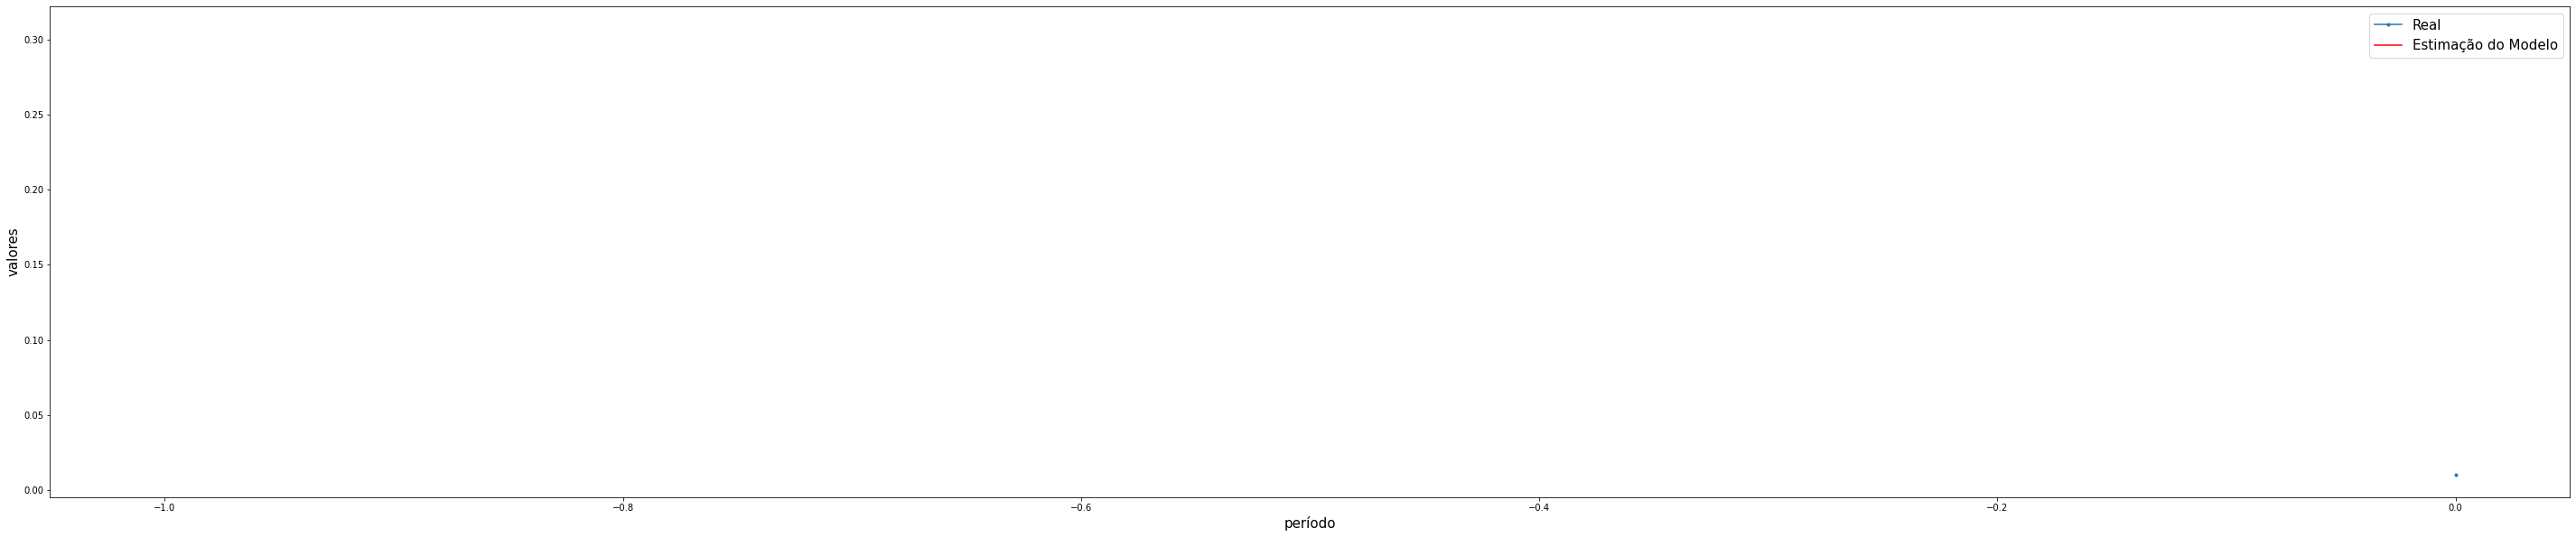

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.        ],
       [0.02087213]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 598ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.12759925]
 [0.13084821]]


#A1BB34

In [ ]:
y=[]
for a in df['A1BB34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.         0.70212852]
treino[2]: [2.         0.44680924]
treino[3]: [3.        0.3882982]
treino[4]: [4.        0.6170221]
treino[5]: [5. 1.]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.70212852]
 [0.44680924]] -> 0.38829819613254063
treino[2]: [[0.44680924]
 [0.3882982 ]] -> 0.6170220968691029
treino[3]: [[0.3882982]
 [0.6170221]] -> 1.0
treino[4]: [[0.6170221]
 [1.       ]] -> 0.9414909806627032
treino[5]: [[1.        ]
 [0.94149098]] -> 0.5319156707180975


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_7 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_15 (LSTM)              (None, 128)               117248    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.507442,0.541356
1,0.481250,0.510550
2,0.462100,0.480015
3,0.437972,0.449488
4,0.418250,0.418741


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 23ms/step - loss: 0.1563
loss: 0.1562889814376831


**Visualização do Processo de Aprendizado**

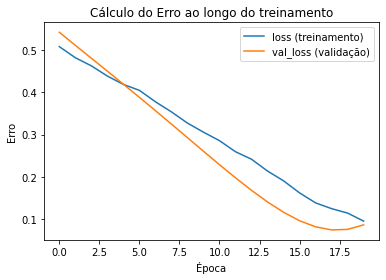

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 596ms/step


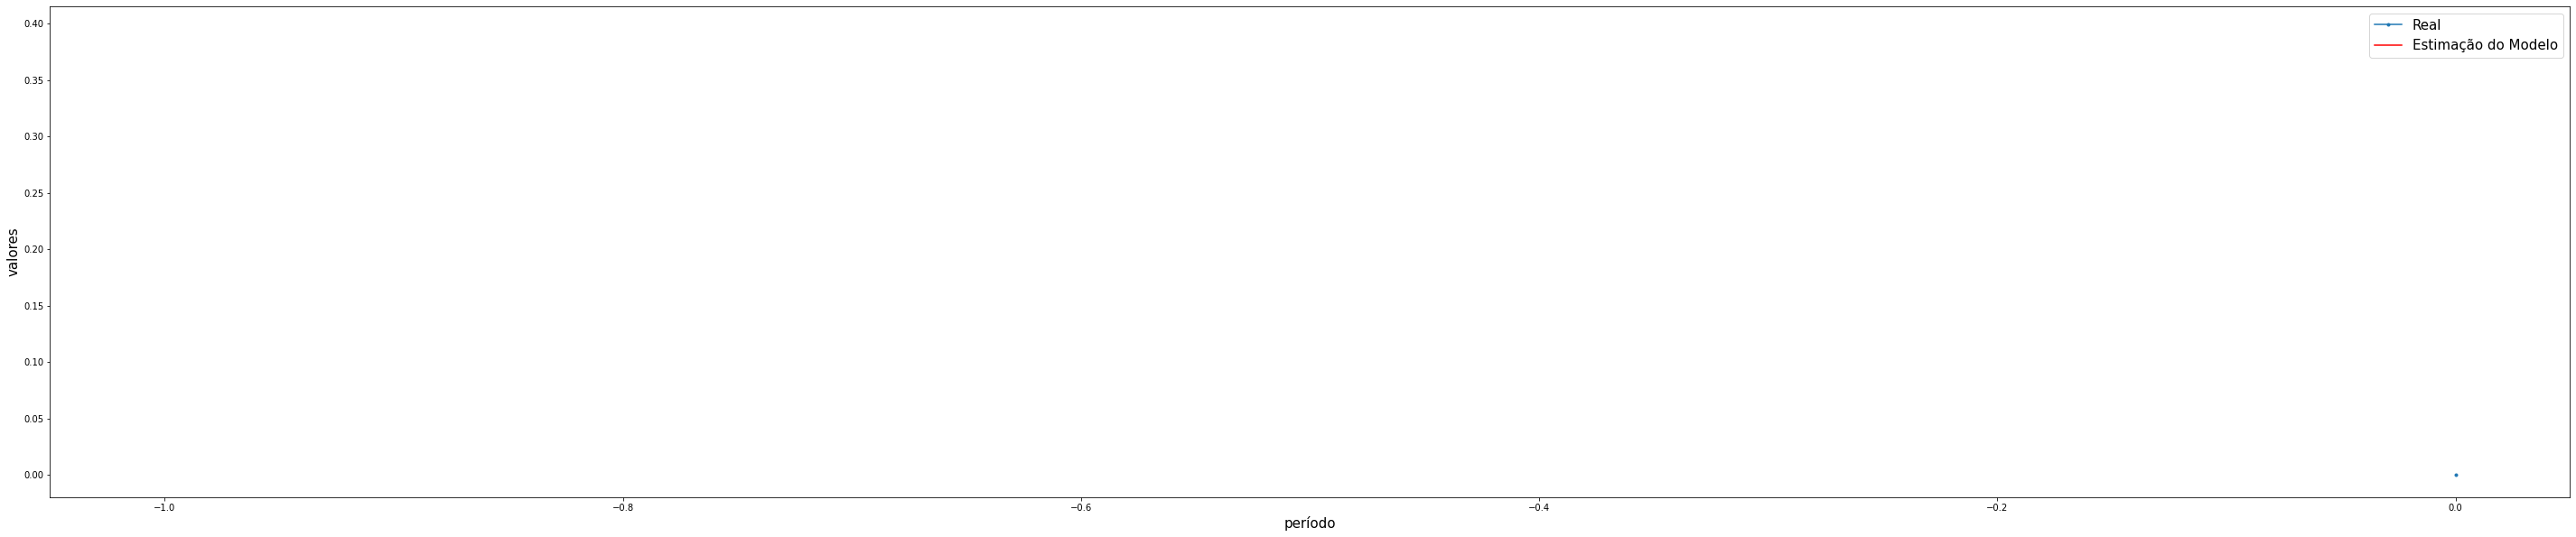

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.1595743 ],
       [0.12765862]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 645ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.15644327]
 [0.15132621]]


#ABTT34

In [ ]:
y=[]
for a in df['ABTT34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1. 1.]
treino[2]: [2.         0.92894723]
treino[3]: [3.         0.98157902]
treino[4]: [4.         0.98157902]
treino[5]: [5.         0.75789417]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[1.        ]
 [0.92894723]] -> 0.9815790239793926
treino[2]: [[0.92894723]
 [0.98157902]] -> 0.9815790239793926
treino[3]: [[0.98157902]
 [0.98157902]] -> 0.7578941662224551
treino[4]: [[0.98157902]
 [0.75789417]] -> 0.7578941662224551
treino[5]: [[0.75789417]
 [0.75789417]] -> 0.6105263580575959


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_8 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_17 (LSTM)              (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.840439,0.449190
1,0.796335,0.422823
2,0.764323,0.396812
3,0.720730,0.370834
4,0.676030,0.344666


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 37ms/step - loss: 0.1389
loss: 0.13890577852725983


**Visualização do Processo de Aprendizado**

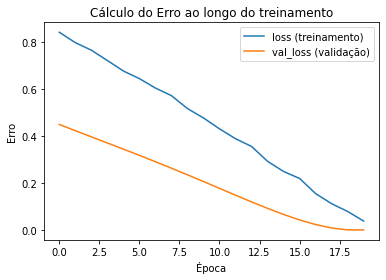

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 857ms/step


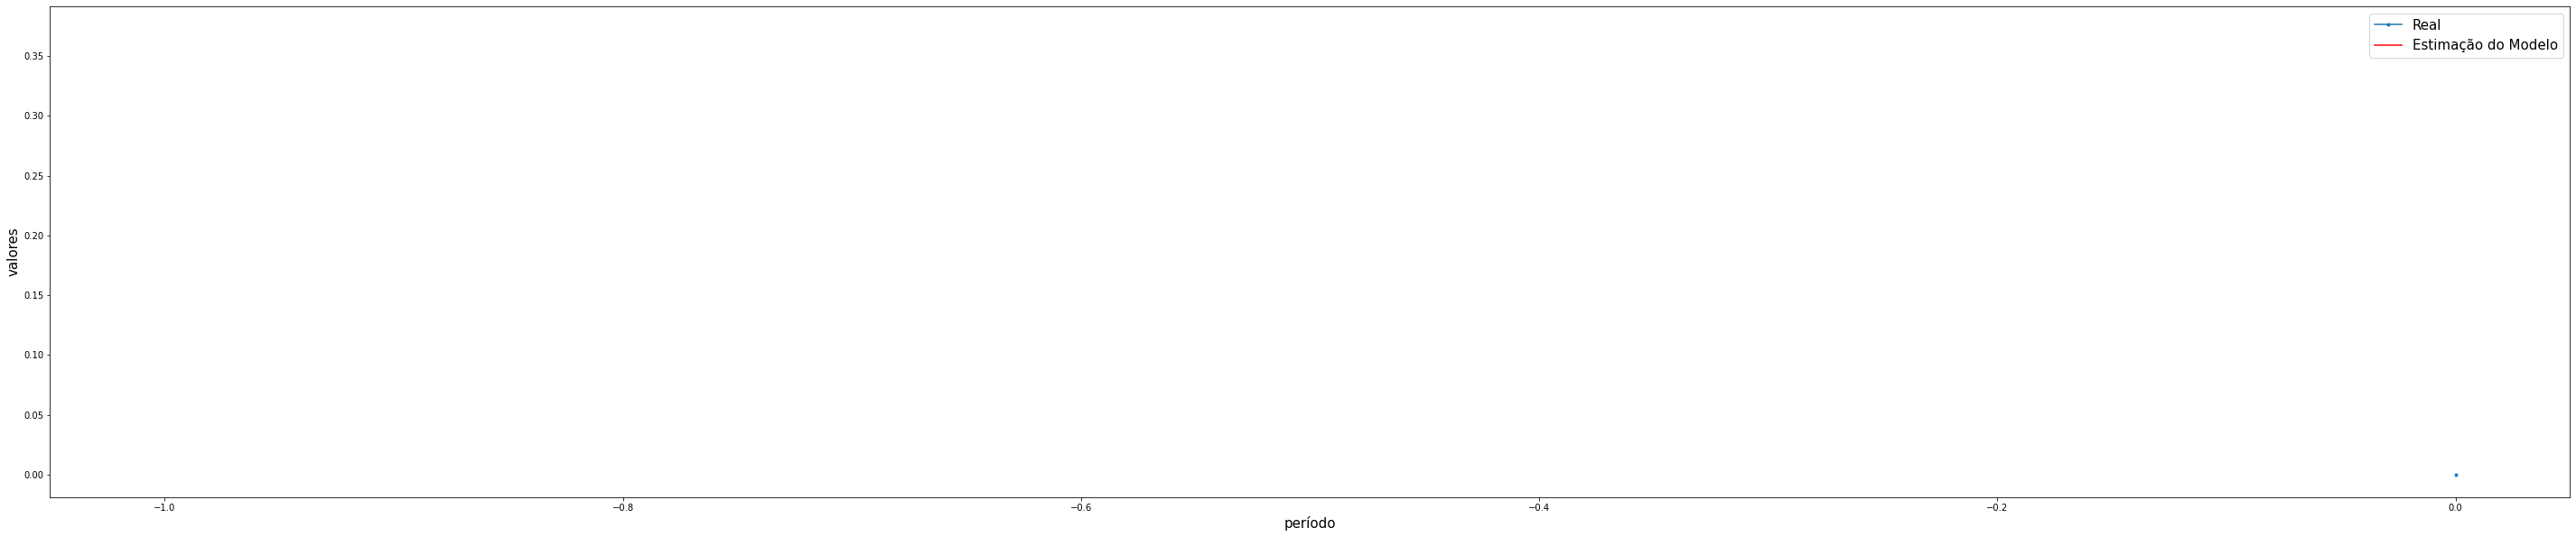

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.27631564],
       [0.04999965]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 598ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.15581788]
 [0.12307985]]


#ABBV34

In [ ]:
y=[]
for a in df['ABBV34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.         0.55284598]
treino[2]: [2.        0.9187004]
treino[3]: [3.         0.87804749]
treino[4]: [4.         0.65040613]
treino[5]: [5.         0.60975632]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.55284598]
 [0.9187004 ]] -> 0.8780474945493228
treino[2]: [[0.9187004 ]
 [0.87804749]] -> 0.6504061258478401
treino[3]: [[0.87804749]
 [0.65040613]] -> 0.609756324491296
treino[4]: [[0.65040613]
 [0.60975632]] -> 0.20325210816376532
treino[5]: [[0.60975632]
 [0.20325211]] -> 0.19512028706382953


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_9 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_19 (LSTM)              (None, 128)               117248    
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.514007,0.031541
1,0.480975,0.025750
2,0.454859,0.020439
3,0.425211,0.015569
4,0.396487,0.011155


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 24ms/step - loss: 0.4373
loss: 0.4373302161693573


**Visualização do Processo de Aprendizado**

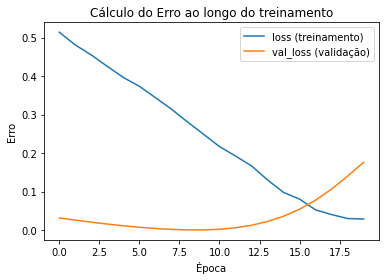

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 641ms/step


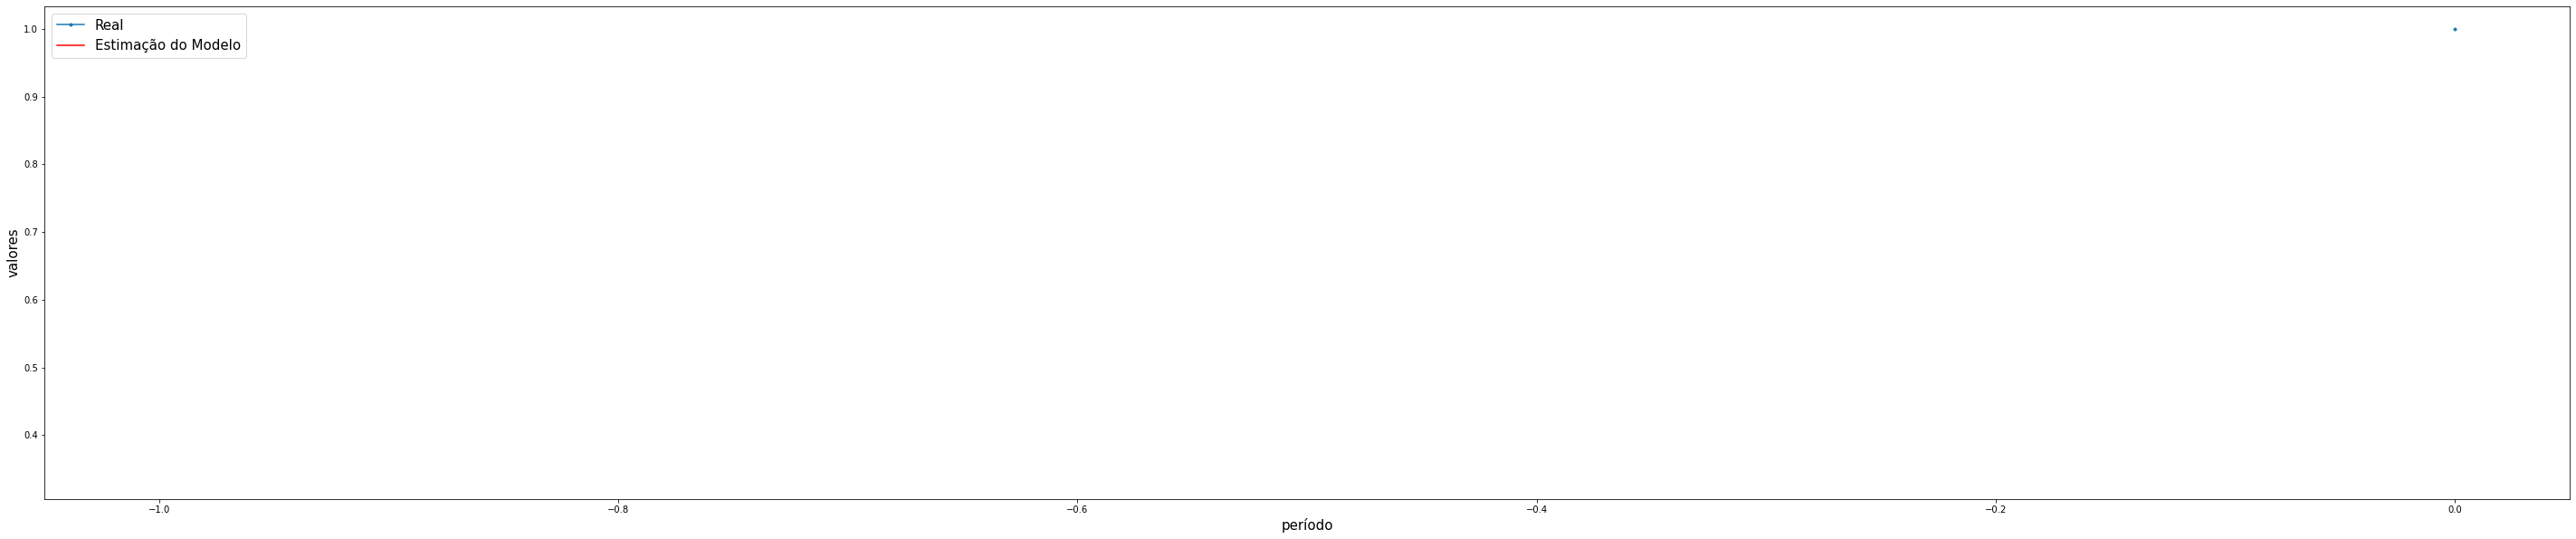

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.        ],
       [0.29268353]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 591ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.1243235 ]
 [0.17135252]]


#RYTT34

In [ ]:
y=[]
for a in df['RYTT34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1. 0.]
treino[2]: [2.         0.70539502]
treino[3]: [3.         0.37759431]
treino[4]: [4. 1.]
treino[5]: [5.        0.8091293]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.        ]
 [0.70539502]] -> 0.37759430677083994
treino[2]: [[0.70539502]
 [0.37759431]] -> 1.0
treino[3]: [[0.37759431]
 [1.        ]] -> 0.809129300629345
treino[4]: [[1.       ]
 [0.8091293]] -> 0.8589197300274785
treino[5]: [[0.8091293 ]
 [0.85891973]] -> 0.6265559509186917


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_10 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_21 (LSTM)              (None, 128)               117248    
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.607412,0.542810
1,0.582000,0.512633
2,0.559276,0.482857
3,0.536568,0.453036
4,0.511432,0.422870


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 22ms/step - loss: 0.0949
loss: 0.09491804987192154


**Visualização do Processo de Aprendizado**

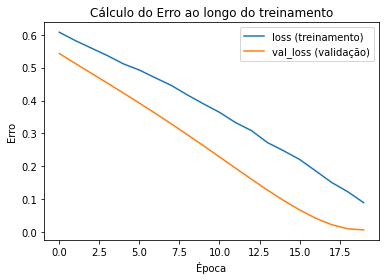

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 572ms/step


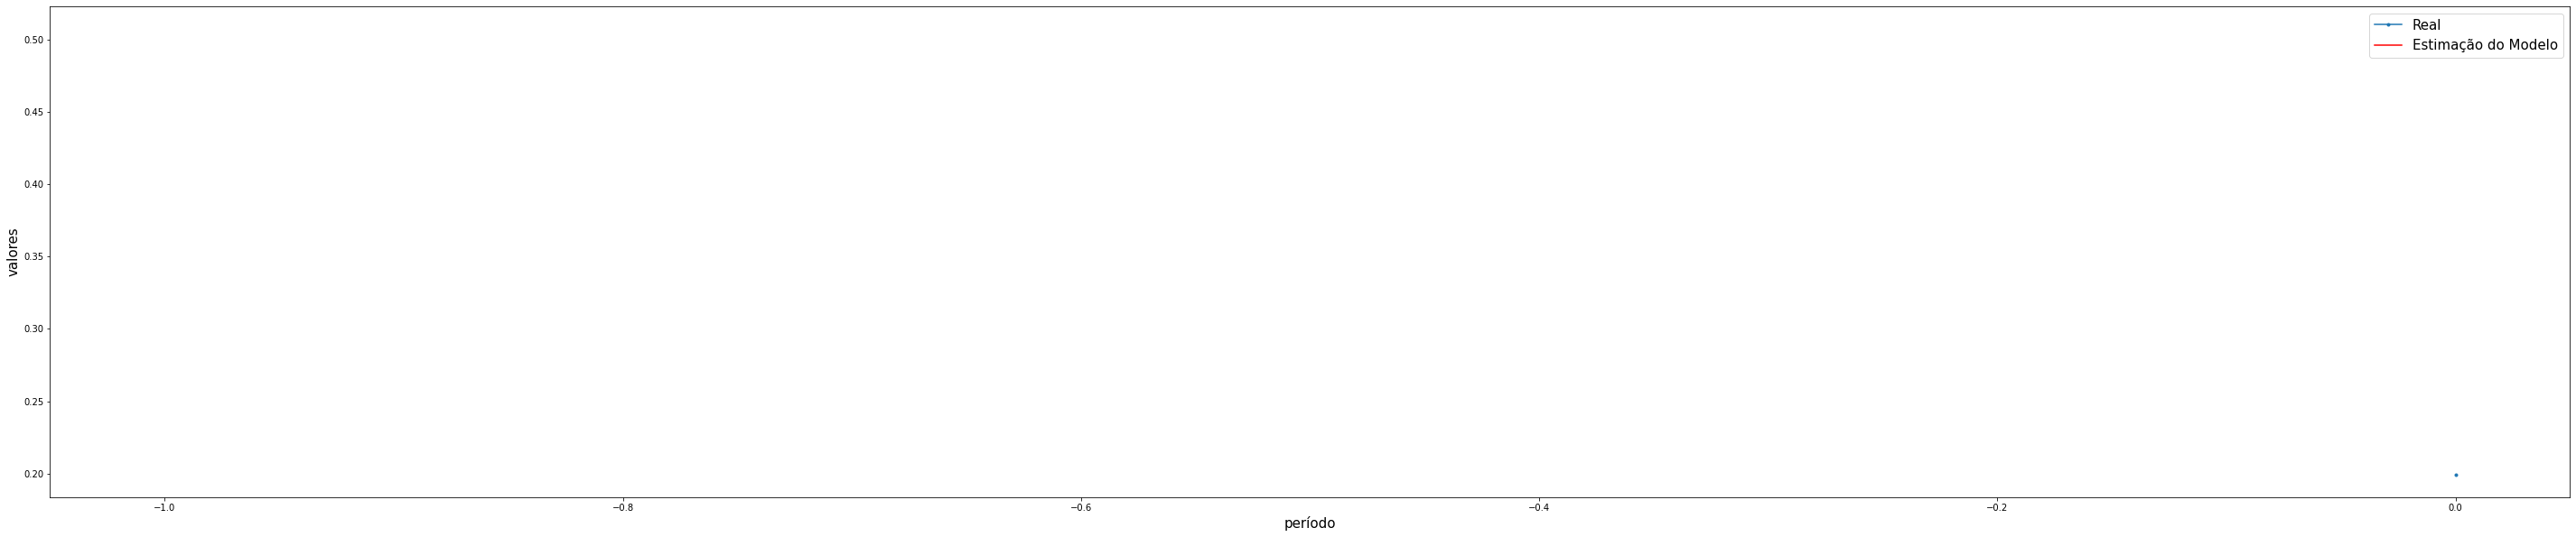

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.41908739],
       [0.41908739]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 621ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.1869132]
 [0.1869132]]


#USBC34

In [ ]:
y=[]
for a in df['USBC34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1. 1.]
treino[2]: [2.         0.61538499]
treino[3]: [3. 0.]
treino[4]: [4. 0.]
treino[5]: [5. 0.]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[1.        ]
 [0.61538499]] -> 0.0
treino[2]: [[0.61538499]
 [0.        ]] -> 0.0
treino[3]: [[0.]
 [0.]] -> 0.0
treino[4]: [[0.]
 [0.]] -> 0.0
treino[5]: [[0.]
 [0.]] -> 0.0


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_11 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_23 (LSTM)              (None, 128)               117248    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.000041,5.434067e-05
1,0.000036,4.130909e-05
2,0.000030,9.730917e-06
3,0.000005,1.288016e-07
4,0.000002,1.010317e-05


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 25ms/step - loss: 9.7955e-07
loss: 9.795537607715232e-07


**Visualização do Processo de Aprendizado**

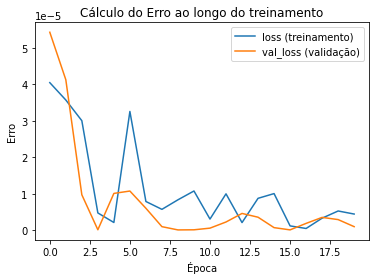

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 823ms/step


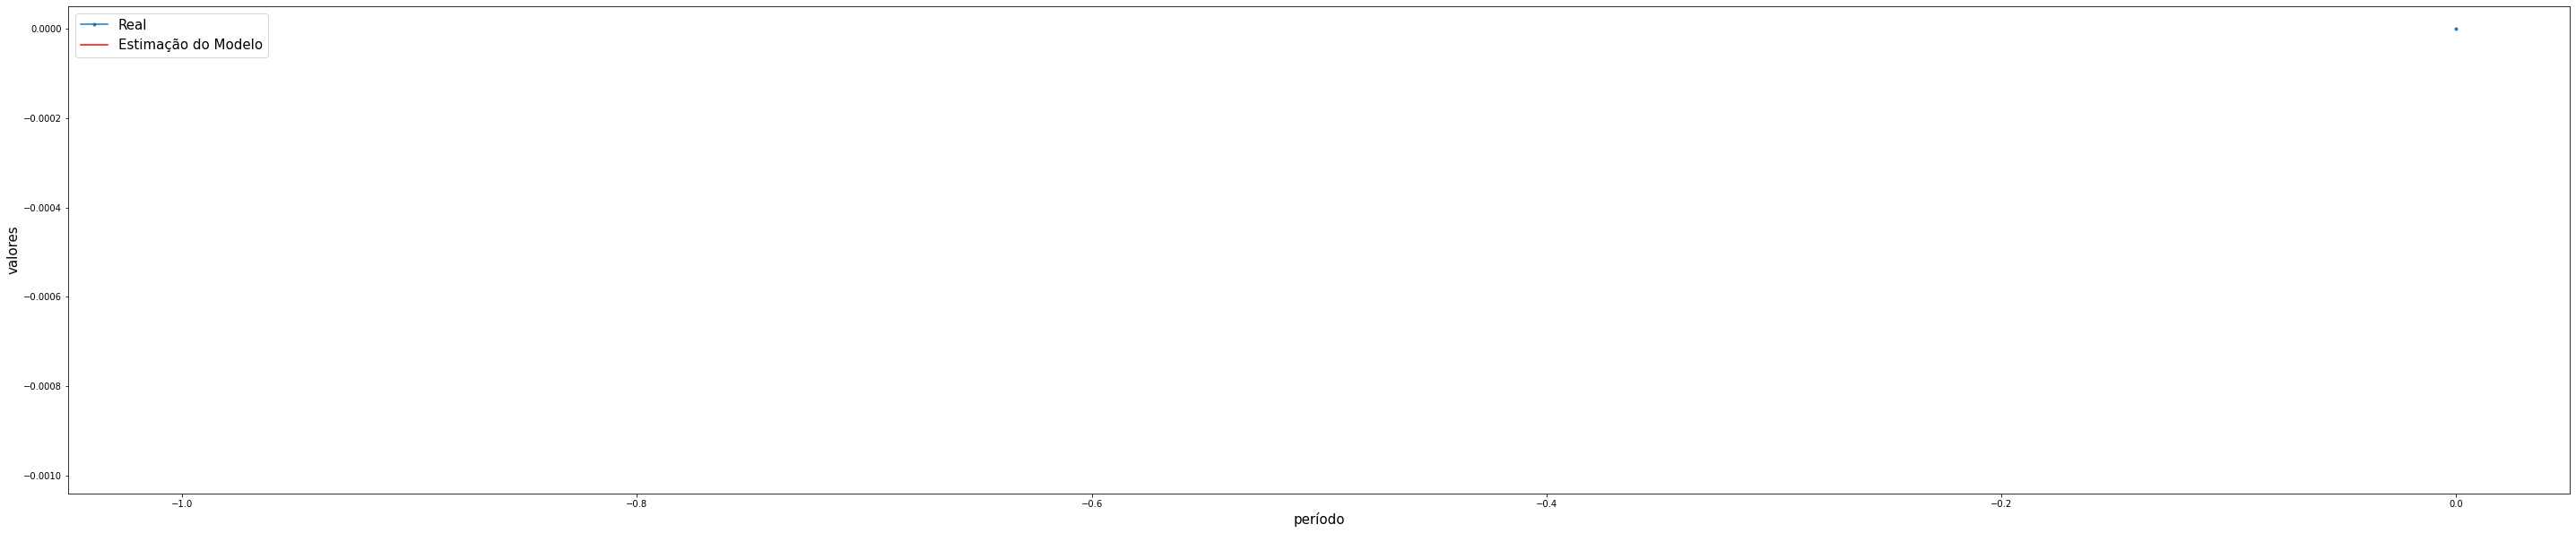

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.],
       [0.]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 888ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[-0.00068114]
 [-0.00068114]]


#ADBE34

In [ ]:
y=[]
for a in df['ADBE34.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1. 1.]
treino[2]: [2.         0.84640015]
treino[3]: [3.         0.85440002]
treino[4]: [4.         0.96960022]
treino[5]: [5.         0.92160034]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[1.        ]
 [0.84640015]] -> 0.8544000244140625
treino[2]: [[0.84640015]
 [0.85440002]] -> 0.9696002197265625
treino[3]: [[0.85440002]
 [0.96960022]] -> 0.921600341796875
treino[4]: [[0.96960022]
 [0.92160034]] -> 0.779200439453125
treino[5]: [[0.92160034]
 [0.77920044]] -> 0.561600341796875


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_12 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_25 (LSTM)              (None, 128)               117248    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.861460,0.444326
1,0.816433,0.415314
2,0.780049,0.387037
3,0.736518,0.358994
4,0.692279,0.330910


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 32ms/step - loss: 0.2369
loss: 0.2368561178445816


**Visualização do Processo de Aprendizado**

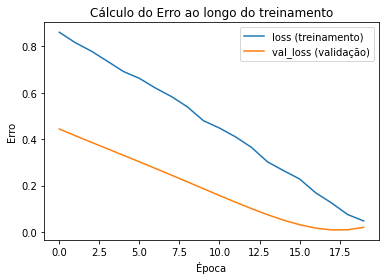

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 969ms/step


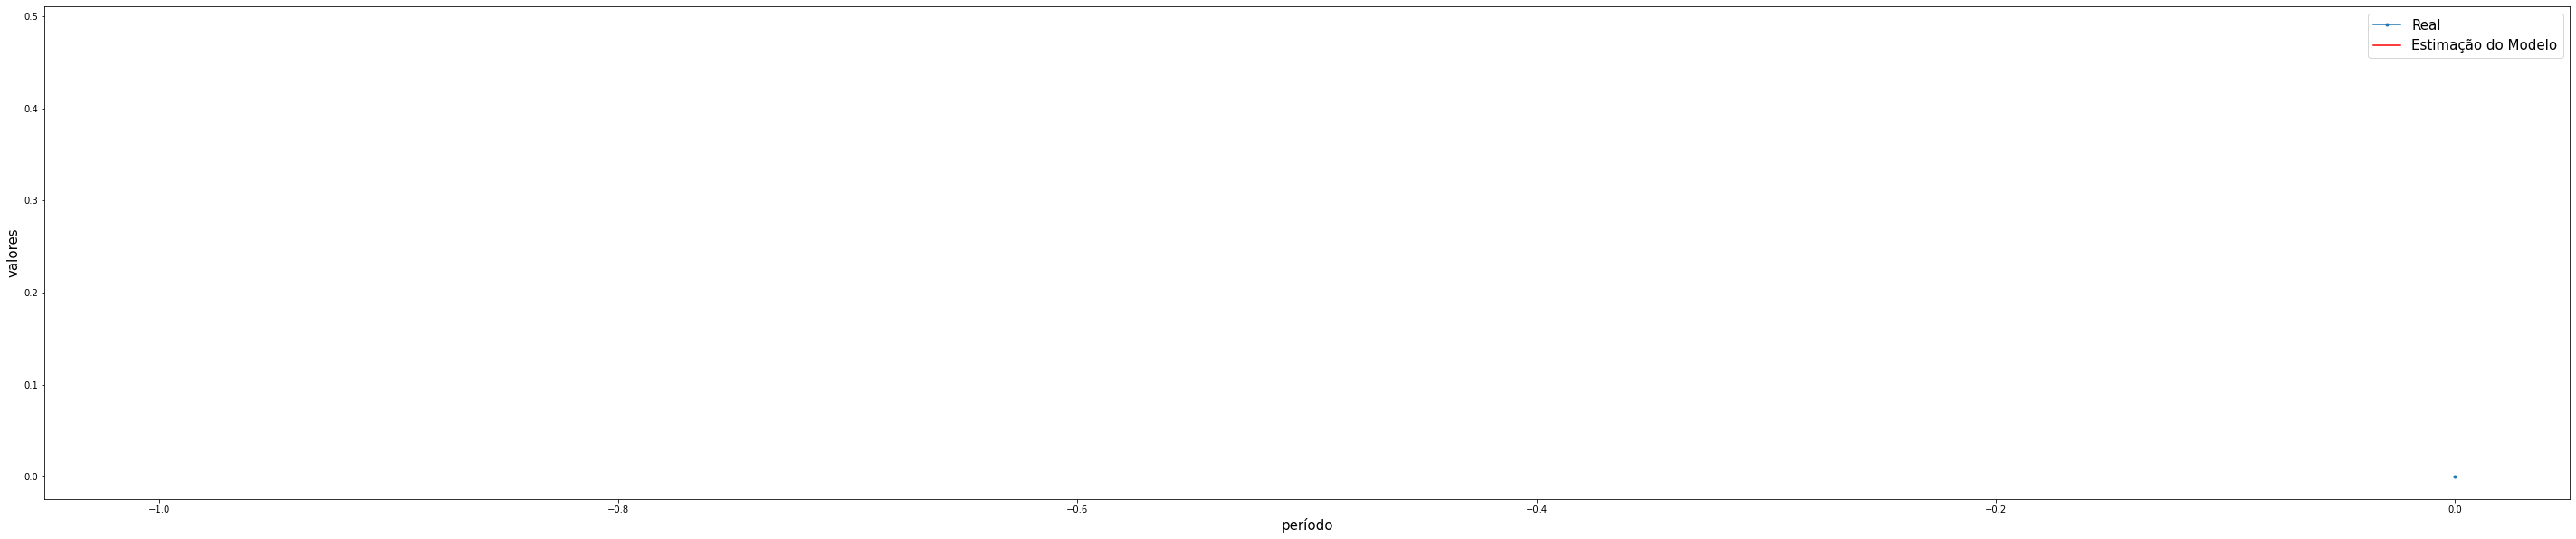

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.39840027],
       [0.37440002]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 1s/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.18214712]
 [0.17854702]]


#XPBR31

In [ ]:
y=[]
for a in df['XPBR31.SA', 'Close']:
  y.append(a)

In [ ]:
x = np.arange (1,len(y)+1,1)


**padronização dos dados**

In [ ]:
minimo = np.min(y)
maximo = np.max(y)
y = (y - minimo)/(maximo - minimo)

**Preparação dos conjuntos de dados de treinamento e de teste**

In [ ]:
percentual_treinamento = 0.7
qtd_treinamento = int(percentual_treinamento*(len(x)));

x_treino = x[0:qtd_treinamento] 
x_teste = x[qtd_treinamento:]

y_treino = y[0:qtd_treinamento]
y_teste = y[qtd_treinamento:]

treino = np.array(list(zip(x_treino, y_treino)))
teste = np.array(list(zip(x_teste, y_teste)))

for i in range(5):
  print('treino[{}]: {}'.format(i+1, treino[i]))


treino[1]: [1.         0.92594701]
treino[2]: [2.         0.84341457]
treino[3]: [3. 1.]
treino[4]: [4.         0.94290548]
treino[5]: [5.         0.99943459]


**Organização do modelo de dados**

In [ ]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [ ]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

**Visualização da estruturação dos dados**

In [ ]:
  look_back = 2

  x_treino, y_treino = preparar_dados(treino, look_back)
  x_teste, y_teste = preparar_dados(teste, look_back)
  n_caracteristicas = 1 #série monovariada
  x_treino = x_treino.reshape((x_treino.shape[0], 
                               x_treino.shape[1], 
                               n_caracteristicas))
  x_teste = x_teste.reshape((x_teste.shape[0], 
                         x_teste.shape[1], 
                         n_caracteristicas))

#print('ax: {}'.format(trainx))
#print('y: {}'.format(y))
  for i in range(5):
    print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))





treino[1]: [[0.92594701]
 [0.84341457]] -> 1.0
treino[2]: [[0.84341457]
 [1.        ]] -> 0.9429054835025688
treino[3]: [[1.        ]
 [0.94290548]] -> 0.999434588193891
treino[4]: [[0.94290548]
 [0.99943459]] -> 0.8304126859260332
treino[5]: [[0.99943459]
 [0.83041269]] -> 0.0


**Criação do Modelo de Redes Neurais**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = x_treino.shape[2]
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))


**Visualização do modelo**

In [ ]:
modelo.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 100)            40800     
                                                                 
 dropout_13 (Dropout)        (None, 2, 100)            0         
                                                                 
 lstm_27 (LSTM)              (None, 128)               117248    
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


**Escolha de Hiperparâmetros**

In [ ]:
modelo.compile(loss = 'mean_squared_error', 
              optimizer = 'adam')

**Treinamento do Modelo**

In [ ]:


historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = False,
                       shuffle = False,
                       validation_split = 0.3)

**Visualização do "aprendizado"**

In [ ]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.967584,0.325419
1,0.916338,0.306562
2,0.878620,0.288616
3,0.820333,0.271418
4,0.778306,0.254894


**Precisão do Modelo**

In [ ]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

1/1 [==============================] - 0s 20ms/step - loss: 0.1020
loss: 0.10201391577720642


**Visualização do Processo de Aprendizado**

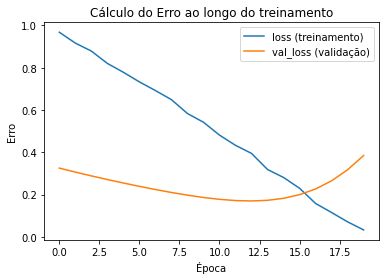

In [ ]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

**Realização da Predição**

In [ ]:
predicao = modelo.predict(x_teste)

1/1 [==============================] - 1s 604ms/step


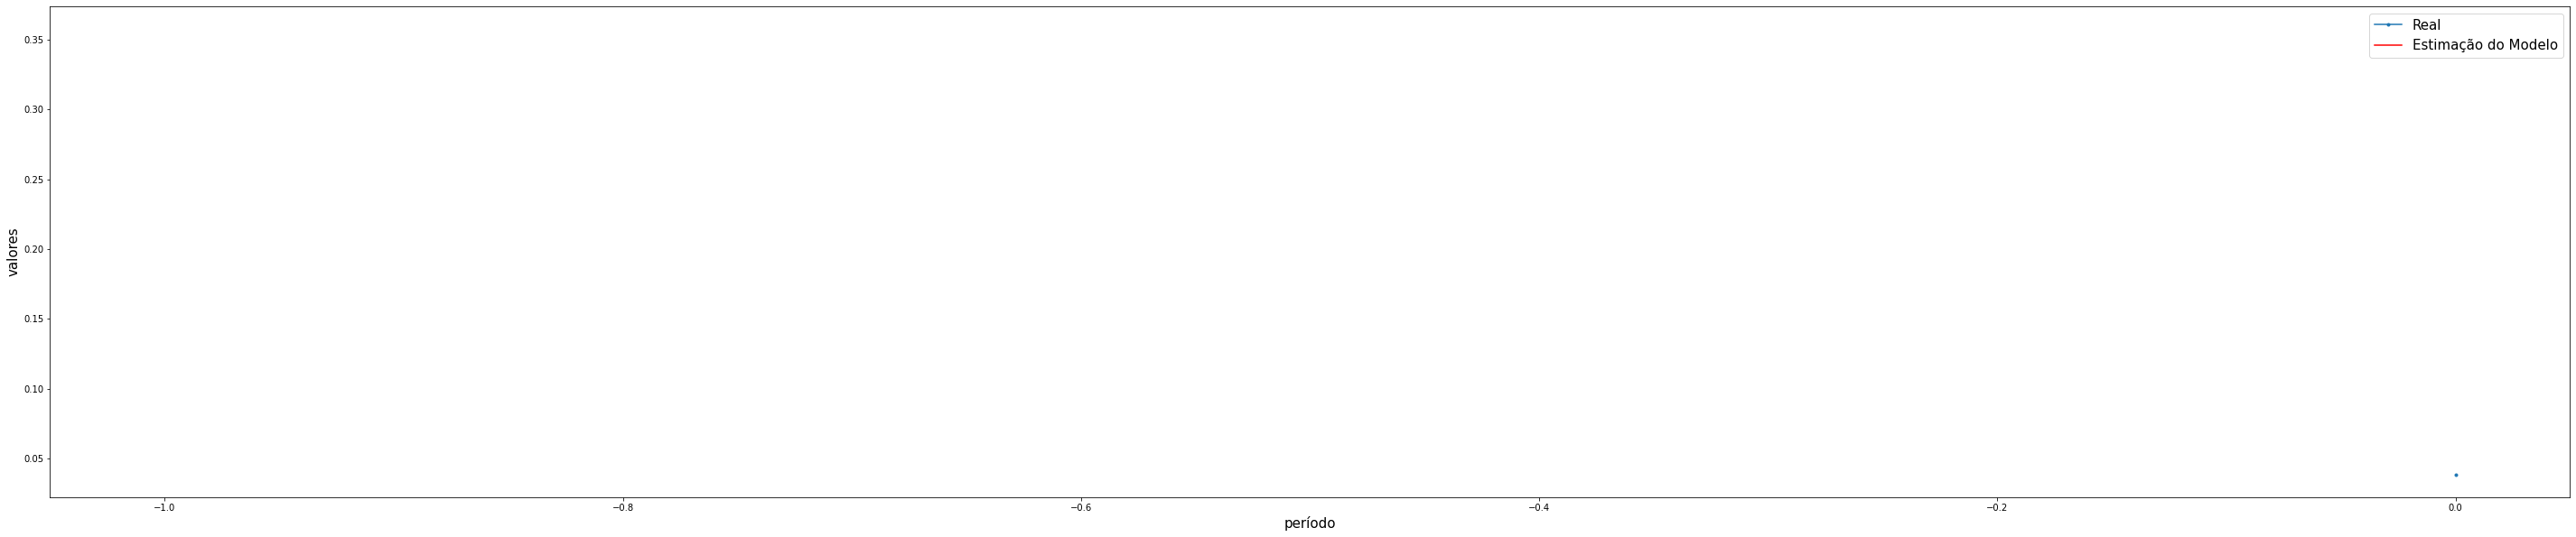

In [ ]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

# **Fazendo Predições**

In [ ]:
len(valores_reais_y)

1

In [ ]:
len(lst_dados_predicao)

1

In [ ]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([[0.10740539],
       [0.08762028]])

In [ ]:
minha_predicao = modelo.predict([x_teste[n-1]])

1/1 [==============================] - 1s 611ms/step


In [ ]:
print(f'minha predição é: {minha_predicao}')

minha predição é: [[0.1471158]
 [0.1439215]]
